# Linear Regression via SGD, QR, SVD, LU, etc.

## Imports

In [148]:
%matplotlib inline

from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import inv
import scipy
from scipy.stats import t
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

## Boston Real Estate Prices

### Features

In [33]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Exploratory Data Analysis

#### Effect of % of lower-status population on price

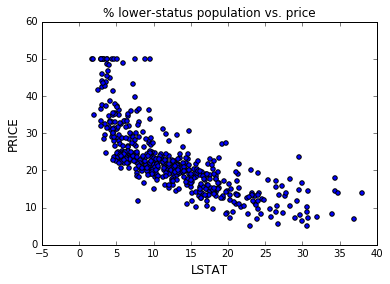

In [1072]:
plt.scatter(boston.data[:, np.where(boston.feature_names == 'LSTAT')], boston.target)
plt.title('% lower-status population vs. price', color='black')
plt.xlabel('LSTAT', {'fontsize':'large'})
plt.ylabel('PRICE', {'fontsize':'large'})


#### Effect of number of rooms on price

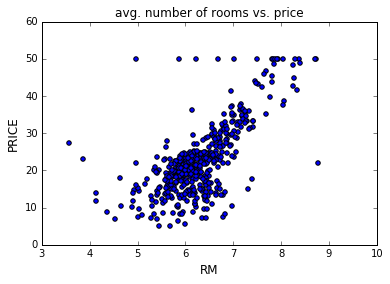

In [1073]:
plt.scatter(boston.data[:, np.where(boston.feature_names == 'RM')], boston.target)
plt.title('avg. number of rooms vs. price', color='black')
plt.xlabel('RM', {'fontsize':'large'})
plt.ylabel('PRICE', {'fontsize':'large'})

#### Relationship between % lower-status and avg. number of rooms

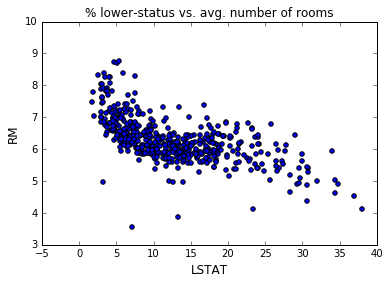

In [1185]:
plt.scatter(boston.data[:, np.where(boston.feature_names == 'LSTAT')],\
            boston.data[:, np.where(boston.feature_names == 'RM')])
plt.title('% lower-status vs. avg. number of rooms', color='black')
plt.xlabel('LSTAT', {'fontsize':'large'})
plt.ylabel('RM', {'fontsize':'large'})

## Linear regression model

### Training / Test Set Split

In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

### Model Training

In [77]:
bos_regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)

bos_regr.fit(X_train, y_train)

print("\n%-17s: %.3f" % ("Training set R^2", bos_regr.score(X_train, y_train)))
print("%-17s: %.3f" % ("Test set R^2", bos_regr.score(X_test, y_test)))

print("\nModel weights:\n")
print("%-10s: %8.3f" % ("Intercept", bos_regr.intercept_))
for i in range(len(bos_regr.coef_)):
    print("%-10s: %8.3f" % (boston.feature_names[i], bos_regr.coef_[i]))
    
print("""

Feature description:

CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's
""")    


Training set R^2 : 0.744
Test set R^2     : 0.711

Model weights:

Intercept :   31.682
CRIM      :   -0.133
ZN        :    0.036
INDUS     :    0.050
CHAS      :    3.121
NOX       :  -15.470
RM        :    4.049
AGE       :   -0.011
DIS       :   -1.387
RAD       :    0.242
TAX       :   -0.009
PTRATIO   :   -0.912
B         :    0.012
LSTAT     :   -0.548


Feature description:

CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by

## Completely Optional - Manual Weight Computation

In [93]:
diabetes = datasets.load_diabetes()

X_no_int = np.array(diabetes.data[:, 0])
shape = (diabetes.data.shape[0], 1)
X = np.concatenate((np.ones(shape), np.array(diabetes.data[:, 0]).reshape(shape)), axis = 1)
y = diabetes.target

### Scikit-learn result for comparison

In [105]:
diab_regr = linear_model.LinearRegression(fit_intercept=True)
diab_regr.fit(X_no_int.reshape(shape), y)
[diab_regr.intercept_, diab_regr.coef_[0]]

[152.13348416289605, 304.18307452829475]

### 1) "Linear algebra 101" method: $(X^TX)^{-1}X^TY$

In [106]:
manual_weights = dot(dot(inv(dot(X.T, X)), X.T), y)
print(manual_weights)

[ 152.13348416  304.18307453]


### 2) Via QR factorization

In [107]:
(q, r) = np.linalg.qr(X)

dot(dot(inv(dot(r.T, r)), r.T), dot(q.T, y))

array([ 152.13348416,  304.18307453])

### 3) Via Cholesky factorization

In [109]:
L = np.linalg.cholesky(dot(X.T, X))

dot(dot(inv(dot(L, L.T)), X.T), y)


array([ 152.13348416,  304.18307453])

### 4) Via SVD

In [110]:
U, s, V = np.linalg.svd(X)
dot(dot(dot(V, np.diag(np.divide(np.ones(2), s))), U[:, 0:X.shape[1]].T), y)

array([ 152.13348416,  304.18307453])

### 5) Via LU factorization

In [147]:
lu = scipy.linalg.lu(X, permute_l = True)
L, U = lu[0], lu[1]
dot(dot(dot(inv(dot(U.T, U)), U.T), dot(inv(dot(L.T, L)), L.T)), y)

array([ 152.13348416,  304.18307453])

### 6) Via batch gradient descent (with momentum)

In [122]:
def estimate_lin_reg(X, y, num_iter, alpha, mom_coef):
    numEx = X.shape[0]
    theta = np.zeros([1, X.shape[1]])
    theta_prev = theta
    yy = np.reshape(y, [y.shape[0], 1])
    for i in range(num_iter):
        mom = theta - theta_prev
        theta_prev = theta
        theta = theta - alpha / numEx * dot(X.T, dot(X, theta.T) - yy).T + mom_coef * mom
    return theta

estimate_lin_reg(X, y, 1000, 0.9, 0.9)

array([[ 152.13348416,  304.18307453]])

## Extending scikit-learn to compute t-statistics and p-values

In [143]:
class LinearRegression(linear_model.LinearRegression):
    """
    Extension of scikit-learn's OLS to handle SE/t/p stats.
    """ 

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = True
        super(LinearRegression, self).__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        augX = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        self.sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(augX.shape[0] - augX.shape[1])
        self.se = np.array([np.sqrt(np.diagonal(self.sse * np.linalg.inv(np.dot(augX.T, augX))))])
        self.t = self.coef_ / self.se
        self.p = 2 * (1 - t.cdf(np.abs(self.t), y.shape[0] - augX.shape[1]))
        return self
    
    def __repr__(self):
        return "%s(\n\tweights = %r\n\tse = %r\n\tt = %r,\n\tp = %r\n)"\
        % (self.__class__.__name__, \
          np.insert(self.coef_, 0, np.array(self.intercept_), axis=0),\
          self.se, self.t, self.p)

In [144]:
lr = LinearRegression()
lr.fit(X_no_int.reshape(shape), y)
# lr.intercept_

LinearRegression(
	weights = array([ 152.13348416,  304.18307453])
	se = array([[  3.60572368,  75.80599913]])
	t = array([[ 84.36117183,   4.01265174]]),
	p = array([[  0.00000000e+00,   7.05568615e-05]])
)